In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
matches = pd.read_csv('../data/raw/matches.csv')
ball = pd.read_csv('../data/raw/ball_by_ball.csv')

matches.head()

,season,venue,event,winner_runs,umpire2,toss_winner,date,neutralvenue,umpire1,city,...,team2,balls_per_over,winner_wickets,tv_umpire,player_of_match,match_referee,outcome,date2,match_number,matchId
0,2007/08,M Chinnaswamy Stadium,Indian Premier League,140.0,RE Koertzen,Royal Challengers Bangalore,2008-04-18,NaN,Asad Rauf,Bangalore,...,Kolkata Knight Riders,6,NaN,AM Saheba,BB McCullum,J Srinath,NaN,NaN,1.0,335982
1,2007/08,"Punjab Cricket Association Stadium, Mohali",Indian Premier League,33.0,SL Shastri,Chennai Super Kings,2008-04-19,NaN,MR Benson,Chandigarh,...,Chennai Super Kings,6,NaN,RB Tiffin,MEK Hussey,S Venkataraghavan,NaN,NaN,2.0,335983
2,2007/08,Feroz Shah Kotla,Indian Premier League,NaN,GA Pratapkumar,Rajasthan Royals,2008-04-19,NaN,Aleem Dar,Delhi,...,Rajasthan Royals,6,9.0,IL Howell,MF Maharoof,GR Viswanath,NaN,NaN,3.0,335984
3,2007/08,Eden Gardens,Indian Premier League,NaN,K Hariharan,Deccan Chargers,2008-04-20,NaN,BF Bowden,Kolkata,...,Deccan Chargers,6,5.0,Asad Rauf,DJ Hussey,FM Engineer,NaN,NaN,4.0,335986
4,2007/08,Wankhede Stadium,Indian Premier League,NaN,DJ Harper,Mumbai Indians,2008-04-20,NaN,SJ Davis,Mumbai,...,Royal Challengers Bangalore,6,5.0,AV Jayaprakash,MV Boucher,J Srinath,NaN,NaN,5.0,335985


In [6]:
matches.columns = matches.columns.str.lower()
ball.columns = ball.columns.str.lower()

In [8]:
ball.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [9]:
matches.columns

Index(['season', 'venue', 'event', 'winner_runs', 'umpire2', 'toss_winner',
       'date', 'neutralvenue', 'umpire1', 'city', 'reserve_umpire', 'winner',
       'eliminator', 'date1', 'method', 'team1', 'toss_decision', 'gender',
       'team2', 'balls_per_over', 'winner_wickets', 'tv_umpire',
       'player_of_match', 'match_referee', 'outcome', 'date2', 'match_number',
       'matchid'],
      dtype='object')

In [10]:
ipl = ball.merge(
    matches,
    left_on='match_id',
    right_on='matchid',
    how='left'
)

ipl.head()

,match_id,season_x,start_date,venue_x,innings,ball,batting_team,bowling_team,striker,non_striker,...,team2,balls_per_over,winner_wickets,tv_umpire,player_of_match,match_referee,outcome,date2,match_number,matchid
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,Kolkata Knight Riders,6,NaN,AM Saheba,BB McCullum,J Srinath,NaN,NaN,1.0,335982
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,Kolkata Knight Riders,6,NaN,AM Saheba,BB McCullum,J Srinath,NaN,NaN,1.0,335982
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,Kolkata Knight Riders,6,NaN,AM Saheba,BB McCullum,J Srinath,NaN,NaN,1.0,335982
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,Kolkata Knight Riders,6,NaN,AM Saheba,BB McCullum,J Srinath,NaN,NaN,1.0,335982
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,Kolkata Knight Riders,6,NaN,AM Saheba,BB McCullum,J Srinath,NaN,NaN,1.0,335982


In [11]:
ipl.drop(columns=['matchid'], inplace=True)

In [12]:
ipl.shape

(243815, 49)

In [13]:
ipl.isnull().sum().head(10)

match_id        0
season_x        0
start_date      0
venue_x         0
innings         0
ball            0
batting_team    0
bowling_team    0
striker         0
non_striker     0
dtype: int64

In [14]:
ipl.fillna(0, inplace=True)

In [15]:
ipl.columns

Index(['match_id', 'season_x', 'start_date', 'venue_x', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'season_y', 'venue_y', 'event', 'winner_runs',
       'umpire2', 'toss_winner', 'date', 'neutralvenue', 'umpire1', 'city',
       'reserve_umpire', 'winner', 'eliminator', 'date1', 'method', 'team1',
       'toss_decision', 'gender', 'team2', 'balls_per_over', 'winner_wickets',
       'tv_umpire', 'player_of_match', 'match_referee', 'outcome', 'date2',
       'match_number'],
      dtype='object')

In [16]:
ipl.to_csv('../data/cleaned/ipl_master.csv', index=False)

In [17]:
ipl['season'].value_counts().sort_index().plot(kind='bar')
plt.title('Matches per Season')
plt.xlabel('Season')
plt.ylabel('Matches')
plt.show()

KeyError: 'season'

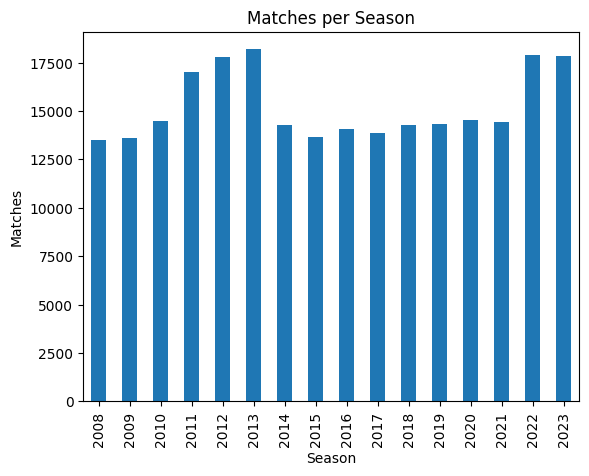

In [18]:
ipl['season_x'].value_counts().sort_index().plot(kind='bar')
plt.title('Matches per Season')
plt.xlabel('Season')
plt.ylabel('Matches')
plt.show()

In [19]:
ipl.rename(columns={'season_x': 'season'}, inplace=True)

In [20]:
'season' in ipl.columns

True

In [21]:
ipl['season']

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
243810    2023
243811    2023
243812    2023
243813    2023
243814    2023
Name: season, Length: 243815, dtype: int64

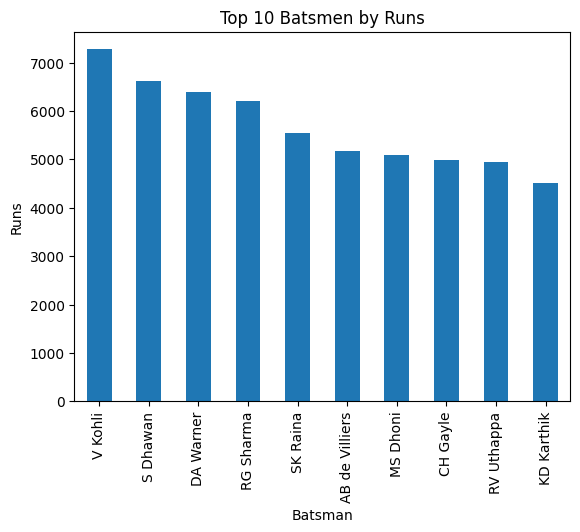

In [22]:
ipl.groupby('striker')['runs_off_bat'] \
   .sum() \
   .sort_values(ascending=False) \
   .head(10) \
   .plot(kind='bar')

plt.title('Top 10 Batsmen by Runs')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.show()

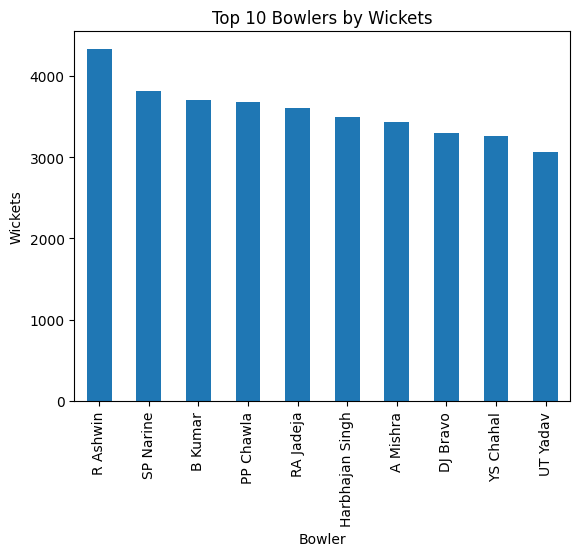

In [23]:
ipl[ipl['player_dismissed'].notna()] \
   ['bowler'] \
   .value_counts() \
   .head(10) \
   .plot(kind='bar')

plt.title('Top 10 Bowlers by Wickets')
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.show()

In [25]:
ipl.to_csv('../data/cleaned/ipl_master.csv', index=False)